# **Laboratorio 5: EDA Multivariado**

Importar librerías

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
#Cargamos el dataset diamonds
data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

##A. Análisis Multivariado: Método no gráfico

### **Variables Categóricas**

Generación de tabulación cruzada

In [7]:
#Creamos una tabla cruzada entre el corte y color
pd.crosstab(data['cut'], data['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678
Good,662,933,909,871,702,522,307
Fair,163,224,312,314,303,175,119


In [8]:
#Creamos una tabla cruzada entre el corte y color
#agregar margins: devuelve la suma (el tipo depende de las cols)
pd.crosstab(data['cut'], data['color'], margins=True)

color,D,E,F,G,H,I,J,All
cut,,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896,21551
Premium,1603,2337,2331,2924,2360,1428,808,13791
Very Good,1513,2400,2164,2299,1824,1204,678,12082
Good,662,933,909,871,702,522,307,4906
Fair,163,224,312,314,303,175,119,1610
All,6775,9797,9542,11292,8304,5422,2808,53940


In [11]:
#Para normalizar a % se usa normalize= all 
pd.crosstab(data['cut'], data['color'], normalize='all', margins=True)

color,D,E,F,G,H,I,J,All
cut,,,,,,,,
Ideal,0.052540,0.072358,0.070931,0.090545,0.057749,0.038802,0.016611,0.399537
Premium,0.029718,0.043326,0.043215,0.054208,0.043752,0.026474,0.014980,0.255673
Very Good,0.028050,0.044494,0.040119,0.042621,0.033815,0.022321,0.012570,0.223990
Good,0.012273,0.017297,0.016852,0.016148,0.013014,0.009677,0.005692,0.090953
Fair,0.003022,0.004153,0.005784,0.005821,0.005617,0.003244,0.002206,0.029848
All,0.125603,0.181628,0.176900,0.209344,0.153949,0.100519,0.052058,1.000000


### **Variables Cuantitativas**

Analizemos las variables cuantitativas

*   La función `cov()` calcula la covarianza entre todas las variables cuantitativas 
*   La función `cor()` calcula la correlación entre todas las variables cuantitativas 

In [16]:
data.cov()

,carat,depth,table,price,x,y,z
carat,0.224687,0.019167,0.192365,1.742765e+03,0.518484,0.515248,0.318917
depth,0.019167,2.052404,-0.946840,-6.085371e+01,-0.040641,-0.048009,0.095968
table,0.192365,-0.946840,4.992948,1.133318e+03,0.489643,0.468972,0.237996
price,1742.765364,-60.853712,1133.318064,1.591563e+07,3958.021491,3943.270810,2424.712613
x,0.518484,-0.040641,0.489643,3.958021e+03,1.258347,1.248789,0.768487
y,0.515248,-0.048009,0.468972,3.943271e+03,1.248789,1.304472,0.767320
z,0.318917,0.095968,0.237996,2.424713e+03,0.768487,0.767320,0.498011


In [18]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


##B. Análisis Multivariado: Método gráfico

## Pila de Bar Plots: Relación entre dos o más datos categóricas.

In [34]:
#Se puede cambiar el tamaño de las figuras 
sns.set(rc={"figure.figsize":(10, 8)}) #ancho=10, alto=8

### **Cat Plots** : Gráfico para la comparación de datos categóricos

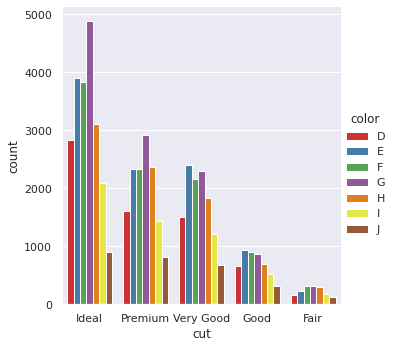

In [36]:
#Gráfico entre corte y color
sns.catplot(x='cut', hue='color', data=data, kind="count", palette="Set1")

### **Bar Plots** : Gráfico para la comparación de datos categóricos y cuantitativos

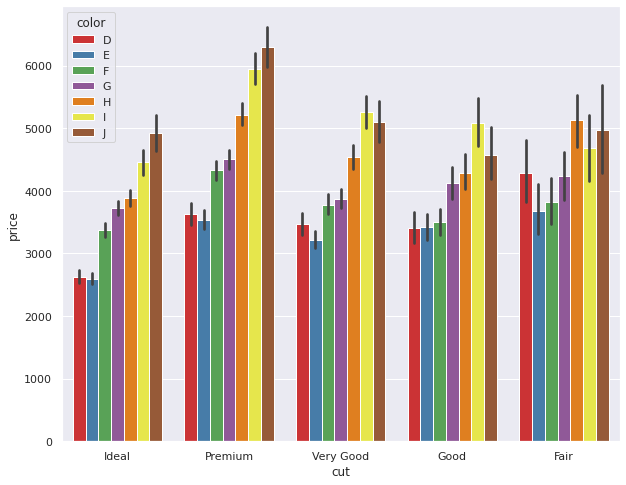

In [38]:
sns.barplot(data=data, x='cut', y='price', hue='color', palette="Set1")

### **Side by side boxplots** : Ayuda a examinar la relación entre una variable categórica y una variable cuantitativa

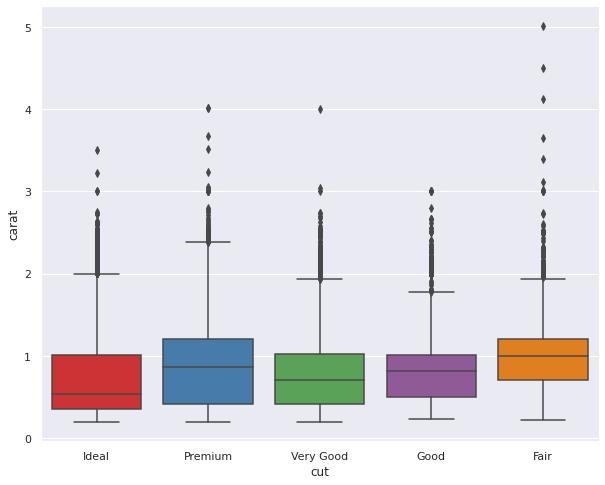

In [40]:
sns.boxplot(data=data, x='cut', y='carat', palette='Set1')

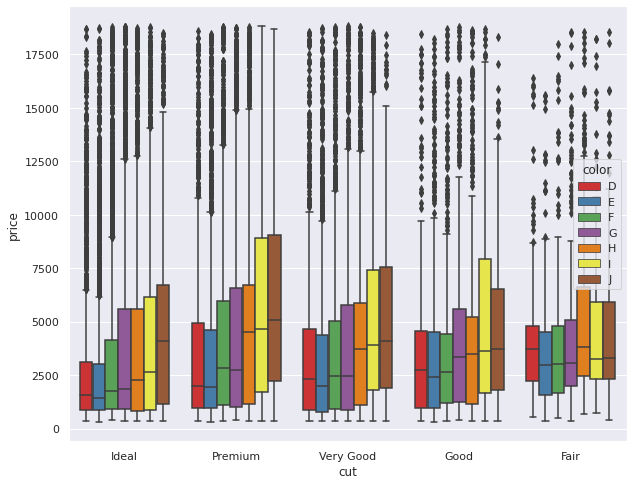

In [41]:
#Gráfica de cajas con agrupación anidada por dos variables categóricas
sns.boxplot(x='cut', y='price', hue='color',
                 data=data, palette="Set1")

### **Histogramas** : Datos cuantitativos y categóricos

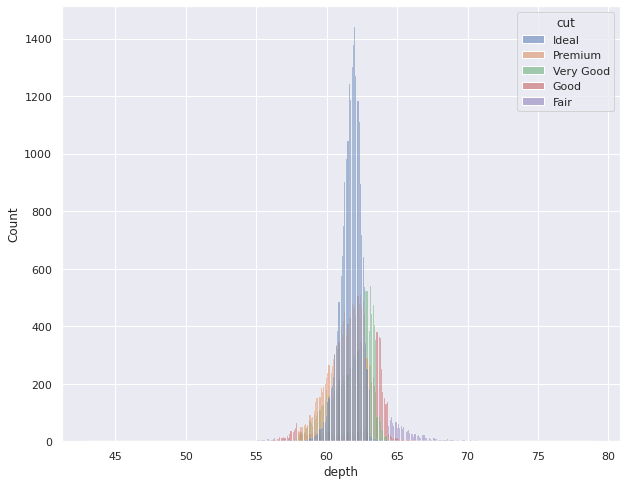

In [48]:
sns.histplot(data=data, x='depth', hue='cut')

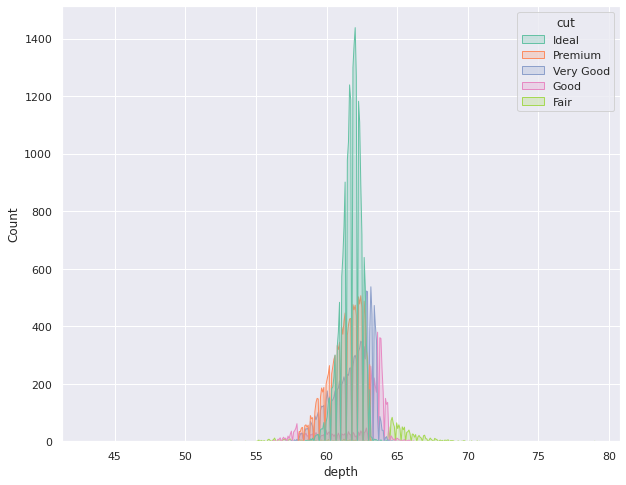

In [51]:
sns.histplot(data=data, x='depth', hue='cut', element="poly", palette='Set2')

### **Scatter Plot**

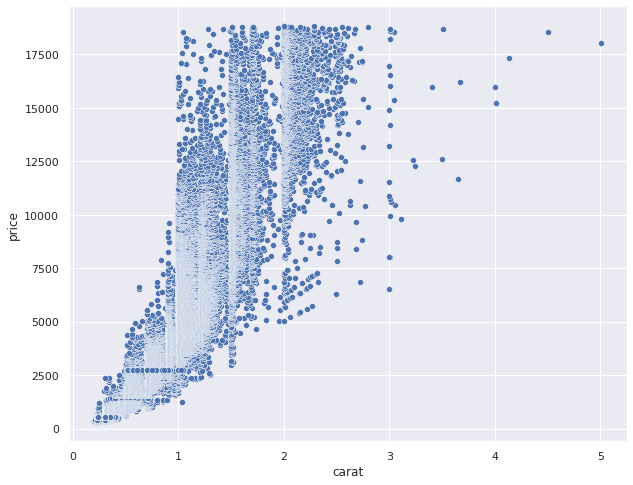

In [52]:
sns.scatterplot(data=data, x='carat', y= 'price')

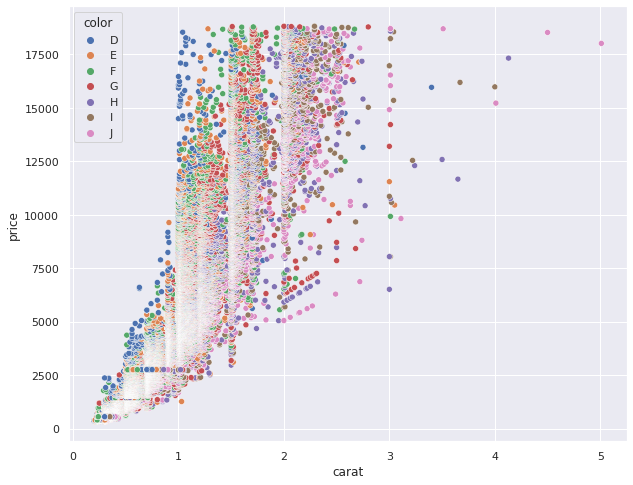

In [53]:
sns.scatterplot(data=data, x='carat', y= 'price', hue='color')

### **Mapas de Calor**

In [57]:
#Crear columna volumen en base a otros datos
data['volumen'] = data.x * data.y * data.z 
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volumen
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [62]:
# Construir una columna en base al volumen del diamante
labels = ['small', 'medium', 'large', 'extra_large']
data['volumen_tag'] = pd.qcut(data['volumen'], q=len(labels), labels=labels)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volumen,volumen_tag
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,small
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,small
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,small
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,small
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,small


In [63]:
#pivot_table: construye tablas en base a dif. datos
pv = data.pivot_table(index = 'cut', columns = ['volumen_tag'], values = 'price')
pv

volumen_tag,small,medium,large,extra_large
cut,,,,
Ideal,767.309598,1605.132298,4052.115083,9243.296368
Premium,789.841400,1551.286629,4215.715558,9278.588843
Very Good,636.927732,1624.210398,4258.999721,9358.714083
Good,639.610723,1570.941313,4221.506010,9261.315109
Fair,879.825397,1637.419192,3575.116212,8418.275330


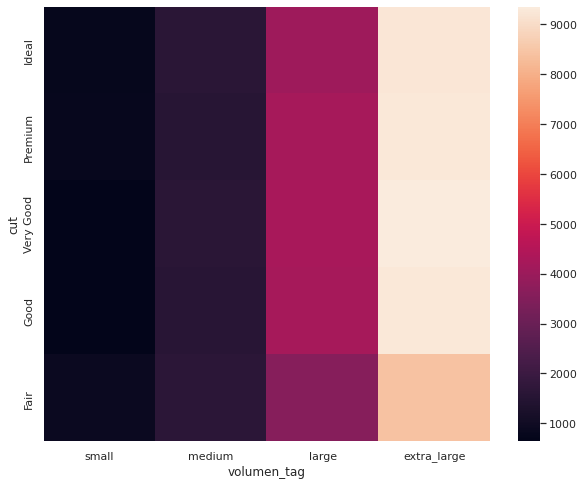

In [64]:
sns.heatmap(pv)

### **Pair Plots**

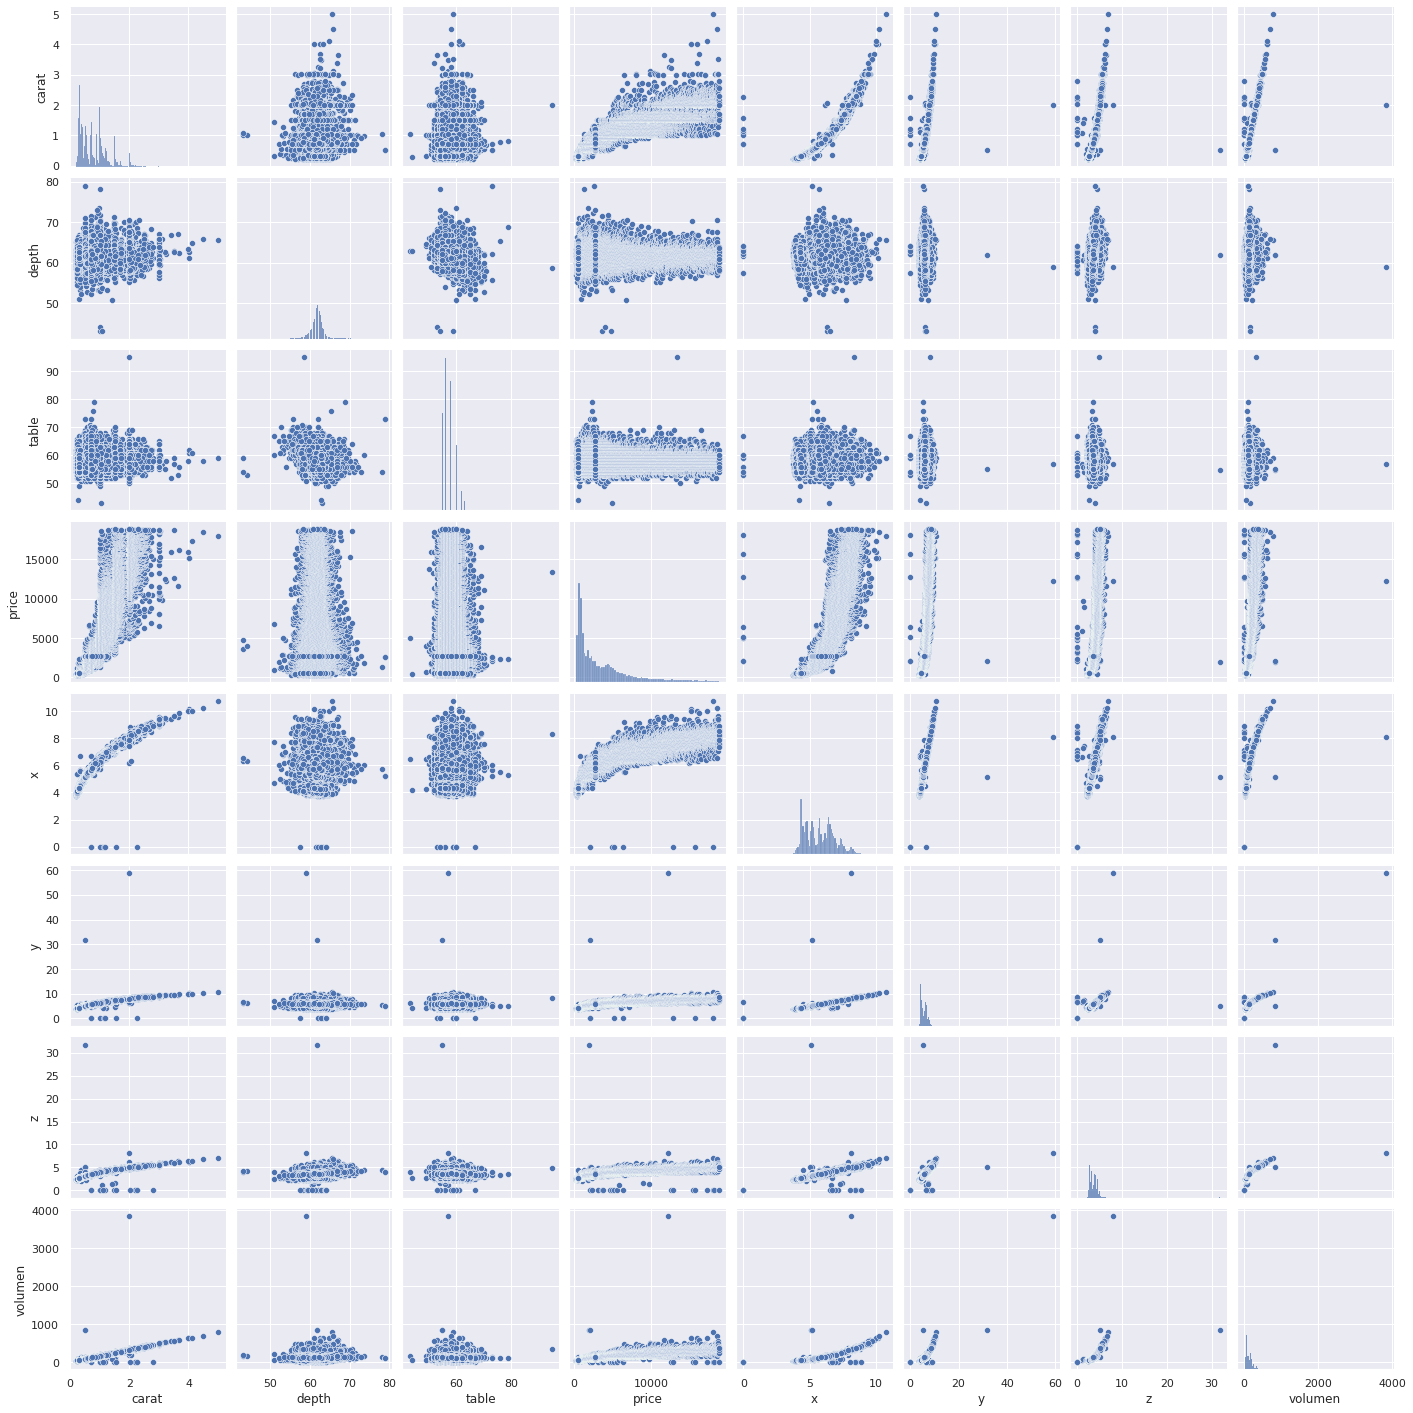

In [65]:
sns.pairplot(data=data)